# Logistic Regression

## 1. Introduction
- **Logistic Regression** is a supervised learning algorithm used for binary classification problems (where the target variable has two possible outcomes, such as 0 or 1).
- Unlike **Linear Regression**, which predicts continuous values, **Logistic Regression** predicts the probability of a certain class or event, such as pass/fail, win/loss, or spam/ham.

## 2. Logistic Function (Sigmoid Function)
- The key difference between **Logistic Regression** and **Linear Regression** is the use of the **logistic function** (also called the **sigmoid function**) to predict probabilities.

### Sigmoid Function:
$
\sigma(z) = \frac{1}{1 + e^{-z}}
$

Where:
- $z$ = the input to the function, which is a linear combination of the input features and their coefficients ($z = \beta_0 + \beta_1 \cdot x_1 + \beta_2 \cdot x_2 + \dots + \beta_n \cdot x_n$).
- $e$ = Euler’s number, approximately $2.718$.
- $\sigma(z)$ = the output of the sigmoid function, which is a value between 0 and 1.

### Interpretation:
- The sigmoid function maps any real-valued number to a value between 0 and 1. This makes it suitable for predicting probabilities.
- The closer $\sigma(z)$ is to 1, the more likely the positive class (1) is. The closer it is to 0, the more likely the negative class (0) is.

## 3. Hypothesis for Logistic Regression
- In **Logistic Regression**, instead of directly predicting $y$ as in **Linear Regression**, we predict the probability of $y$ being 1, given the input features.

### Hypothesis Equation:
$
h_\theta(x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 \cdot x_1 + \dots + \beta_n \cdot x_n)}}$

Where:
- $h_\theta(x)$ = predicted probability that $y = 1$.
- $\beta_0, \beta_1, \dots, \beta_n$ = coefficients of the model.
- $x_1, x_2, \dots, x_n$ = independent variables (features).

### Thresholding:
- To make predictions, we can apply a threshold:
  - If $h_\theta(x) \geq 0.5$, predict class 1.
  - If $h_\theta(x) < 0.5$, predict class 0.

## 4. Cost Function for Logistic Regression
- The cost function used in **Logistic Regression** is different from **Linear Regression** because we are dealing with probabilities. Instead of using Mean Squared Error (MSE), **Logistic Regression** uses the **log-loss** or **cross-entropy loss**.

### Log-Loss (Cost Function):
$
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y_i \log(h_\theta(x_i)) + (1 - y_i) \log(1 - h_\theta(x_i)) \right]
$

Where:
- $m$ = number of training examples.
- $y_i$ = actual label (0 or 1) for the $i^{th}$ training example.
- $h_\theta(x_i)$ = predicted probability for the $i^{th}$ training example.

### Explanation:
- When the actual label $y = 1$, the first term $y_i \log(h_\theta(x_i))$ dominates the cost.
- When the actual label $y = 0$, the second term $(1 - y_i) \log(1 - h_\theta(x_i))$ dominates the cost.
- This cost function penalizes incorrect predictions heavily, especially when the predicted probability is far from the actual label.


## 5. Gradient Descent in Logistic Regression
- Just like in **Linear Regression**, we can use **Gradient Descent** to minimize the cost function and find the optimal parameters $\beta_0, \beta_1, \dots, \beta_n$.
- The key difference is that in **Logistic Regression**, the cost function is non-linear, but **Gradient Descent** still works effectively.

### Gradient Descent Update Rule:
For each parameter $\beta_j$, we update it as follows:
$
\beta_j = \beta_j - \alpha \cdot \frac{\partial}{\partial \beta_j} J(\beta)
$

Where:
- $\alpha$ = learning rate (controls the step size in each iteration).
- $J(\beta)$ = cost function (log-loss).
- $\frac{\partial}{\partial \beta_j} J(\beta)$ = partial derivative of the cost function with respect to $\beta_j$.

### Gradient Descent for Logistic Regression:
For Logistic Regression, the partial derivatives are calculated as:
$
\frac{\partial}{\partial \beta_j} J(\beta) = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x_i) - y_i) \cdot x_{ij}
$

Where:
- $x_{ij}$ is the $j^{th}$ feature of the $i^{th}$ training example.

## 6. Key Concepts

### Decision Boundary:
- The **decision boundary** is a threshold that separates the two classes (0 and 1). In Logistic Regression, this boundary is linear if there is only one feature, and it can become more complex with multiple features.
- The decision boundary is where the predicted probability $h_\theta(x) = 0.5$.

### Overfitting and Underfitting:
- Like other machine learning models, **Logistic Regression** can suffer from **overfitting** (when the model fits the training data too well and performs poorly on unseen data) and **underfitting** (when the model is too simple to capture the relationship between the features and the target).

### Regularization:
- **Regularization** techniques like **L2 regularization (Ridge)** or **L1 regularization (Lasso)** can help prevent overfitting by adding a penalty term to the cost function.
- **L2 regularization** adds the sum of squared coefficients to the cost function:
  $
  J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y_i \log(h_\theta(x_i)) + (1 - y_i) \log(1 - h_\theta(x_i)) \right] + \frac{\lambda}{2m} \sum_{j=1}^{n} \beta_j^2
  $
- **L1 regularization** adds the absolute values of the coefficients:
  $
  J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y_i \log(h_\theta(x_i)) + (1 - y_i) \log(1 - h_\theta(x_i)) \right] + \frac{\lambda}{m} \sum_{j=1}^{n} |\beta_j|
  $
- $\lambda$ is a hyperparameter that controls the amount of regularization.

## 7. Conclusion
- **Logistic Regression** is a simple yet powerful algorithm for binary classification problems. It is widely used because of its interpretability and efficiency.
- The **sigmoid function** enables us to model probabilities, and the **log-loss** cost function ensures that the model focuses on minimizing classification errors.
- **Gradient Descent** helps optimize the model parameters, and regularization techniques can be applied to prevent overfitting.



# Implementation of logistic regression (Single Class)

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('data/insurance_data.csv')
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


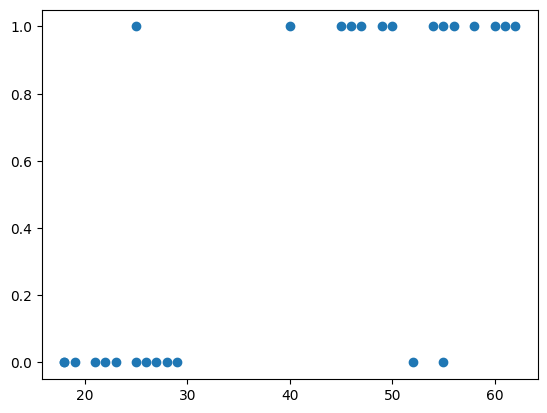

In [3]:
plt.scatter(df.age,df.bought_insurance)

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train,X_test,y_train,y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.9)

In [9]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [10]:
model.predict(X_test)

array([1, 1, 0])

In [11]:
model.score(X_test,y_test)

1.0

In [12]:
model.predict_proba(X_test)

array([[0.13991851, 0.86008149],
       [0.33361941, 0.66638059],
       [0.80712757, 0.19287243]])

## Exercise
Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.
Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
Plot bar charts showing impact of employee salaries on retention
Plot bar charts showing corelation between department and employee retention
Now build logistic regression model using variables that were narrowed down in step 1
Measure the accuracy of the model

# Implementation of logistic regression (Multiclass)

In [35]:
from sklearn.datasets import load_digits
digits = load_digits()

<Figure size 640x480 with 0 Axes>

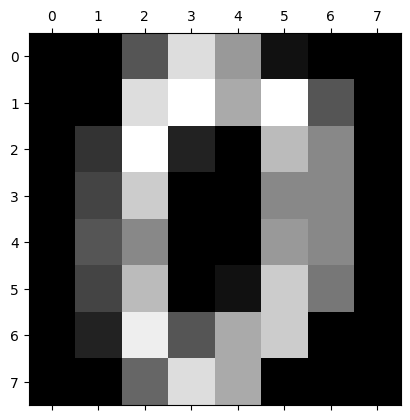

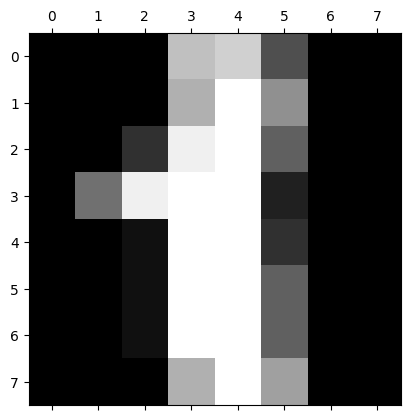

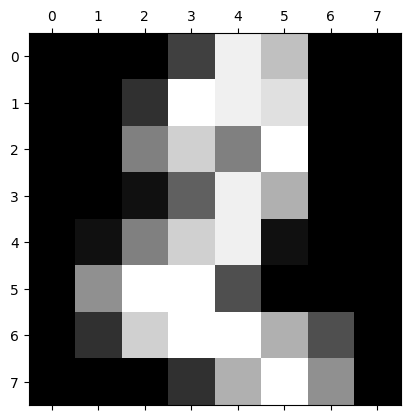

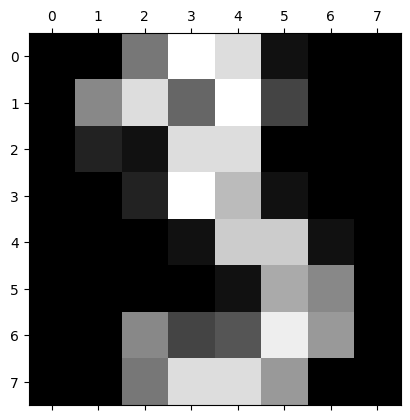

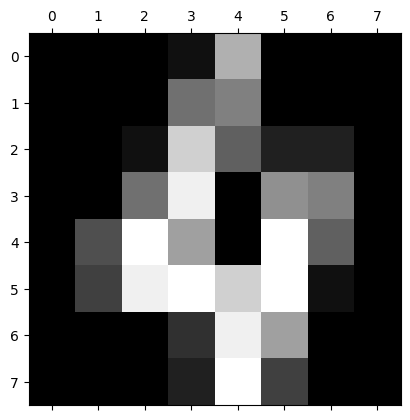

In [36]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [37]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

## Create and train logistic regression model

In [38]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target, test_size=0.2)

In [43]:
model.fit(X_train, y_train)

C:\Users\laksh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Measure accuracy of our model

In [44]:
model.score(X_test, y_test)

0.9555555555555556

In [ ]:
model.predict(digits.data[0:5])

### Confusion Matrix

In [46]:
y_predicted = model.predict(X_test)

In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)
cm

array([[31,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 52,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  1, 32,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 25,  0,  0,  0,  1,  0,  1],
       [ 0,  1,  0,  0, 37,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 35,  1,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 32,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 32,  0,  3],
       [ 0,  0,  0,  0,  0,  1,  0,  0, 36,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 32]])

Text(95.72222222222221, 0.5, 'Truth')

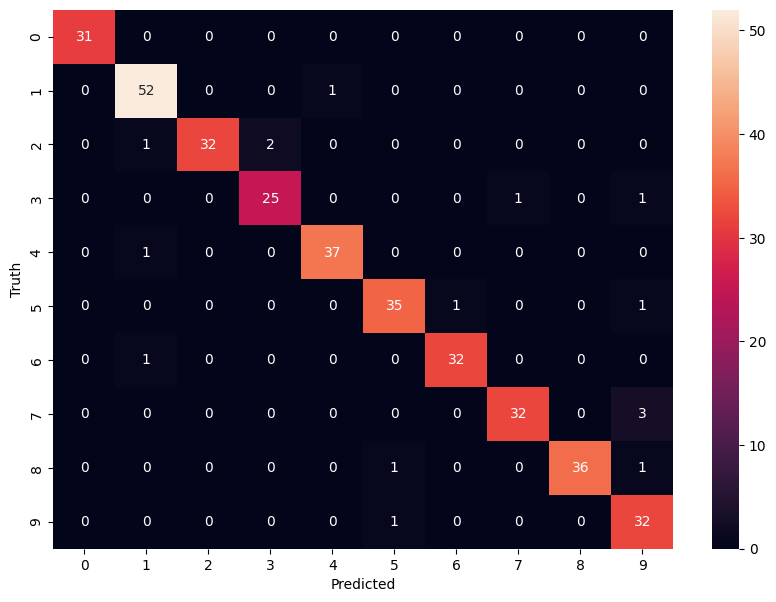

In [50]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [13]:
df = pd.read_csv('data/hr_data.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [14]:
emp_left = df[df['left']==1]
emp_left.shape

(3571, 10)

In [15]:
emp_retained = df[df['left']==0]
emp_retained.shape

(11428, 10)

**Average numbers for all columns**

In [16]:
df.drop(columns=['Department','salary'], errors='ignore').groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


From above table we can draw following conclusions,

- **Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)
- **Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)
- **Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm

**Impact of salary on employee retention**

<Axes: xlabel='salary'>

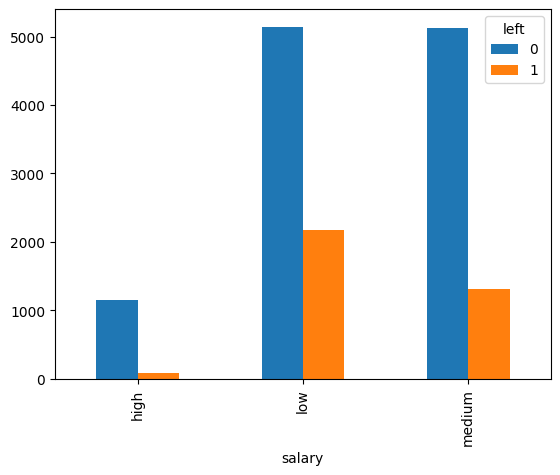

In [17]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

Above bar chart shows employees with high salaries are likely to not leave the company

**Department wise employee retention rate**

<Axes: xlabel='Department'>

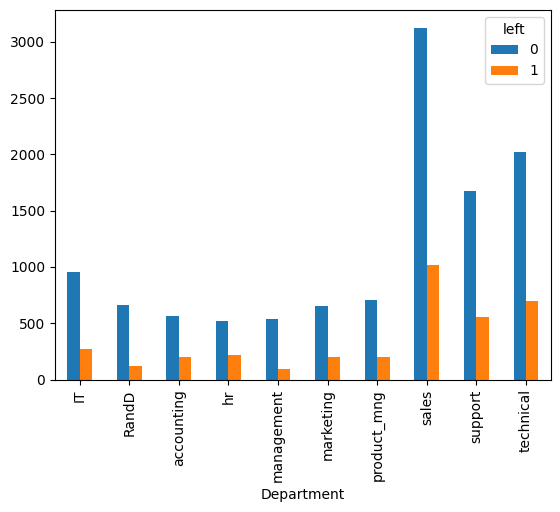

In [18]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

From above chart there seem to be some impact of department on employee retention but it is not major hence we will ignore department in our analysis

### From the data analysis so far we can conclude that we will use following variables as independant variables in our model
1. **Satisfaction Level**
2. **Average Monthly Hours**
3. **Promotion Last 5 Years**
4. **Salary**

In [19]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


### Tackle salary dummy variable

Salary has all text data. It needs to be converted to numbers and we will use dummy variable for that. Check my one hot encoding tutorial to understand purpose behind dummy variables.

In [25]:
salary_dummies = pd.get_dummies(subdf.salary,prefix='salary')
salary_dummies.head()

,salary_high,salary_low,salary_medium
0,False,True,False
1,False,False,True
2,False,False,True
3,False,True,False
4,False,True,False


In [21]:
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')

In [23]:
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,False,True,False
1,0.80,262,0,medium,False,False,True
2,0.11,272,0,medium,False,False,True
3,0.72,223,0,low,False,True,False
4,0.37,159,0,low,False,True,False



Now we need to remove salary column which is text data. It is already replaced by dummy variables so we can safely remove it

In [26]:
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,False,True,False
1,0.80,262,0,False,False,True
2,0.11,272,0,False,False,True
3,0.72,223,0,False,True,False
4,0.37,159,0,False,True,False


In [28]:
X = df_with_dummies
y = df['left']

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.3)

In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [31]:
model.fit(X_train,y_train)

LogisticRegression()

In [32]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

#### Accuracy of the model

In [34]:
model.score(X_test,y_test)

0.7851428571428571

## Exercise

Use sklearn.datasets iris flower dataset to train your model using logistic regression. You need to figure out accuracy of your model and use that to predict different samples in your test dataset. In iris dataset there are 150 samples containing following features,

1. Sepal Length
2. Sepal Width
3. Petal Length
4. Petal Width


Using above 4 features you will clasify a flower in one of the three categories,

1. Setosa
2. Versicolour
3. Virginica

![](https://raw.githubusercontent.com/codebasics/py/801ee0ee4d342fd22b89915dc0c4864250a0ec10/ML/8_logistic_reg_multiclass/iris_petal_sepal.png)